# APA Laboratori 4 - Sistemes lineals (regularitzats)

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --upgrade 
# !pip install numpy --upgrade
# !pip install scipy --upgrade
# !pip install statsmodels --upgrade
# !pip install scikit-learn --upgrade
%load_ext autoreload

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
pd.set_option('precision', 3)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Extra imports
from numpy.random import normal
from numpy.linalg import inv, svd, cond, pinv
from statsmodels.genmod.generalized_linear_model import GLM
from pandas import read_csv
from scipy import stats
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso

veiem que les matrius $A·A^T$ i $A^T·A$ són diferents

`1j` es la unitat imaginaria, definim la matriu 

In [4]:
A = np.array([[0,1j],[0,1]])
A

array([[0.+0.j, 0.+1.j],
       [0.+0.j, 1.+0.j]])

$A\cdot A^T$ és la matriu (-1 i; i 1)

In [5]:
A@A.T  # el simbol @ es la multiplicació de matrius en numpy

array([[-1.+0.j,  0.+1.j],
       [ 0.+1.j,  1.+0.j]])

$A^T \cdot A$ és la matriu tot zeros

In [6]:
A.T@A

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

***

## EXEMPLE 1

 Resolució d'un problema artificial senzill


 Definició del sistema lineal a resoldre
 
 $t = f(x) + \epsilon$
 
on $f(x) = (1 + 1/9)(x-1) + 10$ i $\epsilon \sim N(0,1)$

In [7]:
N=10
X=np.array([[1]*N,range(1,11)]).T
X

array([[ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10]])

In [8]:
t= np.linspace(9,20,num=N)+normal(size=N)
t

array([ 8.27098422, 10.52270153, 11.57451043, 11.61698802, 13.93946336,
       15.27490323, 15.66396609, 19.78918239, 17.59525074, 20.07005656])

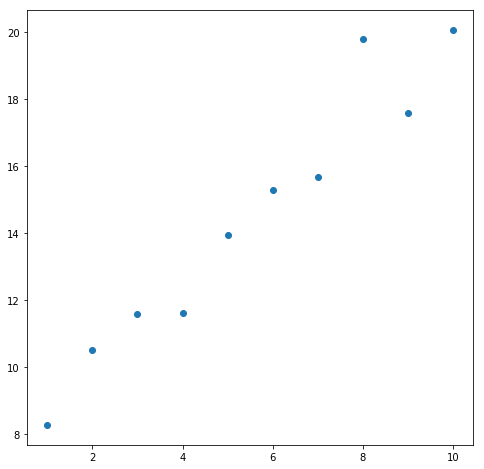

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X[:,1], t, 'o');


### Solució de problemes de mínims quadrats de l'estil 

$\min_w || t - Xw ||^2$

1) Resolució mitjançant la pseudo-inversa

$X^T \cdot X$

In [10]:
C = X.T @ X
C

array([[ 10,  55],
       [ 55, 385]])

$(X^T \cdot X)^{-1} \cdot X^T$

In [11]:
X_pseudo = inv(C) @ X.T
X_pseudo

array([[ 0.4       ,  0.33333333,  0.26666667,  0.2       ,  0.13333333,
         0.06666667,  0.        , -0.06666667, -0.13333333, -0.2       ],
       [-0.05454545, -0.04242424, -0.03030303, -0.01818182, -0.00606061,
         0.00606061,  0.01818182,  0.03030303,  0.04242424,  0.05454545]])

In [12]:
X_pseudo @ X # és pseudo-inversa esquerra d'X

array([[1.00000000e+00, 8.88178420e-16],
       [1.38777878e-17, 1.00000000e+00]])

In [13]:
w = X_pseudo @ t
w

array([7.42349301, 1.27423775])

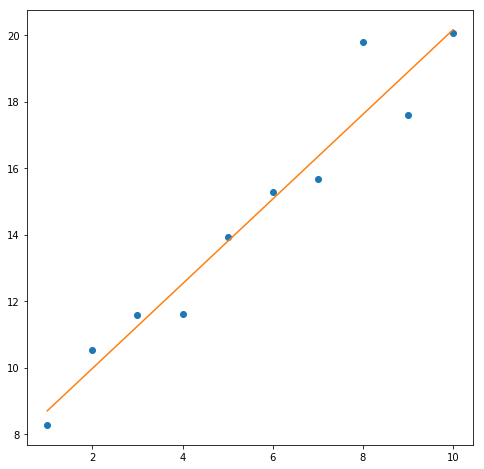

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X[:,1], t, 'o');
ax.plot(X[:,1], w[0] + X[:,1] * w[1], '-');

2) Resolució mitjançant la SVD

In [15]:
u, d, v = svd(X, full_matrices=False)
u,d,v

(array([[ 0.0571102 ,  0.58497262],
        [ 0.10704739,  0.48685286],
        [ 0.15698459,  0.38873309],
        [ 0.20692178,  0.29061332],
        [ 0.25685898,  0.19249355],
        [ 0.30679617,  0.09437379],
        [ 0.35673337, -0.00374598],
        [ 0.40667056, -0.10186575],
        [ 0.45660776, -0.19998551],
        [ 0.50654495, -0.29810528]]),
 array([19.82171108,  1.44905821]),
 array([[ 0.14218125,  0.98984064],
        [ 0.98984064, -0.14218125]]))

Les dues columnes d'X són linealment independents, i per tant els dos valors singulars són diferents de 0; en altres paraules, $rang(X) = 2 = min(10,2)$, per tant X és "full rank"

ara comprovem que $X = U D V^T$

In [16]:
D = np.diag(d)

u @ D @ v.T


array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

Ara ho apliquem a la solució del problema de mínims quadrats

$\min_w || t - Xw ||^2$

In [17]:
D = np.diag(1/d)
w = v @ D @ u.T @ t
w

array([7.42349301, 1.27423775])

noteu que obtenim la mateixa solució

La rutina `glm()` implementa regressió lineal per mínims quadrats si li demanem
 mitjançant el paràmetre `family = gaussian`

In [18]:
mostra = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1],'t':t})
mostra

,x1,x2,t
0,1,1,8.271
1,1,2,10.523
2,1,3,11.575
3,1,4,11.617
4,1,5,13.939
5,1,6,15.275
6,1,7,15.664
7,1,8,19.789
8,1,9,17.595
9,1,10,20.070


 Noteu que glm sempre afegeix un terme *intercept* o *offset* (un regressor constant 1) per defecte, així que tenim dues opcions:

 1) desactivar-lo (el "-1" a la fòrmula següent) i usar la nostra pròpia columna de 1's

In [19]:
model1 = GLM.from_formula('t ~ x2 + x1 -1', mostra)
result = model1.fit()

2) usar la que glm ja posa (recomanat) i desactivar la nostra pròpia columna de 1's

In [20]:
model2 = GLM.from_formula('t ~ x2', mostra)
result = model2.fit()

 Els coefficients (el vector w)

In [21]:
result.params

Intercept    7.423
x2           1.274
dtype: float64

** Per què la SVD?**

  a. En formar la matriu $X^T X$ es pot perdre informació

In [22]:
eps = 1e-3
X_eps = np.array([[1,1],[eps,0],[0,eps]])
X_eps

array([[1.   , 1.   ],
       [0.001, 0.   ],
       [0.   , 0.001]])

In [23]:
C_eps = X_eps.T @ X_eps
C_eps

array([[1.000001, 1.      ],
       [1.      , 1.000001]])

In [24]:
inv(C_eps)# comencem a tenir problemes ...

array([[ 500000.25003573, -499999.75003598],
       [-499999.75003598,  500000.25003573]])

In [25]:
eps = 1e-10
X_eps = np.array([[1,1],[eps,0],[0,eps]])
X_eps

array([[1.e+00, 1.e+00],
       [1.e-10, 0.e+00],
       [0.e+00, 1.e-10]])

In [26]:
C_eps = X_eps.T @ X_eps
C_eps

array([[1., 1.],
       [1., 1.]])

In [27]:
inv(C_eps)# dóna error (la matriu 2x2 "tot uns" és singular)

LinAlgError: Singular matrix

 (el determinant és 1·1 - 1·1 = 0)

 però no ho hauria de ser ... aquesta no és la nostra matriu ...
 el problema és que l'operacio $X^T$ X fa perdre molta precissió numèrica (hem perdut epsilon)

b. El número de condició d'una matriu

 El número de condició d'una matriu és el producte entre la norma de la matriu
 i la norma de la seva inversa
 Dóna una indicació de l'exactitud dels resultats de la inversió d'una matriu
 Valors prop d'1 indiquen una matriu ben condicionada

 El número de condició de la matriu $X^T X$ és el quadrat del de la matriu $X$

 Incidentalment, el número de condició corresponent a usar la norma-2 equival al quocient entre el valor singular més gran i el més petit (no nul) de la matriu

 La rutina `cond()` calcula el número de condició

In [28]:
cond(X)
cond(X.T @ X)

13.679030222900371

187.1158678390236

veiem-ho amb un exemple:

In [29]:
X= np.array([[1]*N, np.linspace(101,110,num=10)]).T
X

array([[  1., 101.],
       [  1., 102.],
       [  1., 103.],
       [  1., 104.],
       [  1., 105.],
       [  1., 106.],
       [  1., 107.],
       [  1., 108.],
       [  1., 109.],
       [  1., 110.]])

In [30]:
cond(X)
cond(X.T @ X)

3878.275839190437

15041023.484257316

Una solució molt senzilla és centrar la segona columna:

In [31]:
X= np.array([[1]*N, np.linspace(101,110,num=10)]).T
X[:,1] = X[:,1] - np.mean(X[:,1])
X

array([[ 1. , -4.5],
       [ 1. , -3.5],
       [ 1. , -2.5],
       [ 1. , -1.5],
       [ 1. , -0.5],
       [ 1. ,  0.5],
       [ 1. ,  1.5],
       [ 1. ,  2.5],
       [ 1. ,  3.5],
       [ 1. ,  4.5]])

In [32]:
cond(X)
cond(X.T @ X)

2.8722813232690134

8.25

Hi ha una relació senzilla entre els dos sistems lineals; en altres paraules, podem "post-processar els coeficients de sortida perquè corresponguin a la matriu inicial

 Nota: hi ha una rutina que calcula directament la pseudo-inversa (ho fa via la SVD):

In [33]:
pinv(X)

array([[ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ],
       [-0.05454545, -0.04242424, -0.03030303, -0.01818182, -0.00606061,
         0.00606061,  0.01818182,  0.03030303,  0.04242424,  0.05454545]])

***

## EXEMPLE 2

 Anem a analitzar dades de greix corporal
 mitjançant regressió normal i ridge (regularitzada)


In [34]:
bodyfat_data = read_csv("bodyfatdata.txt", 
                        delim_whitespace=True, 
                        names=['triceps', 'thigh', 'midarm', 'bodyfat'])
bodyfat_data.describe()
N=bodyfat_data.shape[0]

,triceps,thigh,midarm,bodyfat
count,20.000,20.000,20.000,20.000
mean,25.305,51.170,27.620,20.195
std,5.023,5.235,3.647,5.106
min,14.600,42.200,21.300,11.700
25%,21.500,47.775,24.750,17.050
50%,25.550,52.000,27.900,21.200
75%,29.900,54.625,30.025,24.275
max,31.400,58.600,37.000,27.200


 let us start with standard linear regression

In [35]:
model = GLM.from_formula('bodyfat ~ triceps + thigh + midarm', bodyfat_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                bodyfat   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          6.1503
Method:                          IRLS   Log-Likelihood:                -44.312
Date:                Thu, 06 Sep 2018   Deviance:                       98.405
Time:                        14:33:55   Pearson chi2:                     98.4
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.0847     99.782      1.173      0.241     -78.485     312.655
triceps        4.3341      3.016      1.437      0.151      -1.576      10.244
thigh         -2.8568      2.582     -1.106      0.269      -7.918       2.204
midarm        -2.1861      1.595     -1.370      0.171      -5.313       0.941
==============================================================================
"""

 How to read this output:

 $x = (1,triceps, thigh, midarm)^T$

$w = (117.085, 4.334, -2.857, -2.186)^T$

 the model is $y(x; w) = w^T x = 117.085 + 4.334*triceps -2.857*thigh -2.186*midarm$

 The residuals are the differences $(t_n - y(x_n; w)), n = 1,\dots N$
 
 let's inspect `model$residuals`

/usr/lib64/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


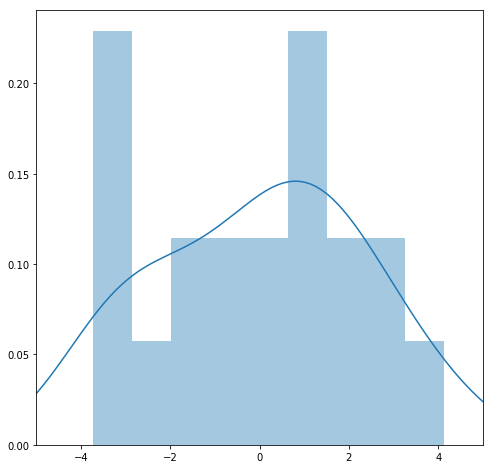

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-5,5])
sn.distplot(result.resid_response,bins=9);

 Do the residuals look Gaussian? this is direct indication of model validity
 (since it was our departing assumption)

 Let's do a more informative plot (a QQ-plot), which plots actual quantiles
 against theoretical quantiles of a comparison distribution (Gaussian in this case)

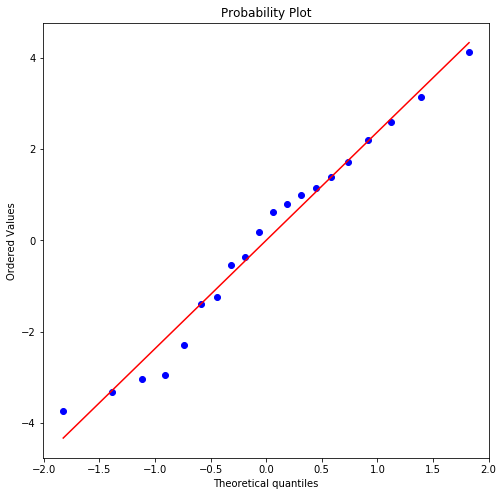

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

 The solid line corresponds to the theoretical quantiles
 therefore in this case the residuals are not even close 
 (the tails are heavier, the central part is flatter)

 This is how we can compute the mean square error

In [38]:
prediction = result.predict(bodyfat_data.loc[:,'triceps':'midarm'])
mean_square_error = np.sum((bodyfat_data.bodyfat - prediction)**2)/N
mean_square_error

4.92024440837829

 Is this number large or small? it depends on the magnitude of the targets!
 a very good practice is to normalise it, by dividing by the variance of the target:

In [39]:
norm_mse = np.sum((bodyfat_data.bodyfat - prediction)**2) /  \
                  ((N-1)*np.var(bodyfat_data.bodyfat))
norm_mse

0.2090962622501365

 If we divide the mean square error by the variance of the targets t,
 we get the proportion of the variability of the target that is NOT explained by the model

 A model with 'norm.mse' equal to 1 is as good as the best constant model
 (namely, the model that always outputs the average of the target)

 models with 'norm.mse' above 0.5 are so so, beyond 0.7 they begin to be quite bad

 models with 'norm.mse' below 0.2 are quite good

 The Multiple R-squared (usually used by statisticians) is obtained by subtracting this quantity form one; that is, the proportion of the target variability that is explained by the model; in this case it reaches ~80%

In [40]:
R_squared = (1 - norm_mse)*100
R_squared

79.09037377498636

 The "adjusted R-squared" is the same thing, but adjusted for the complexity of the model,
 i.e. the number of parameters (three in our case)

 Now let us try to see how are the real predictions by plotting the real predictions against the targets:

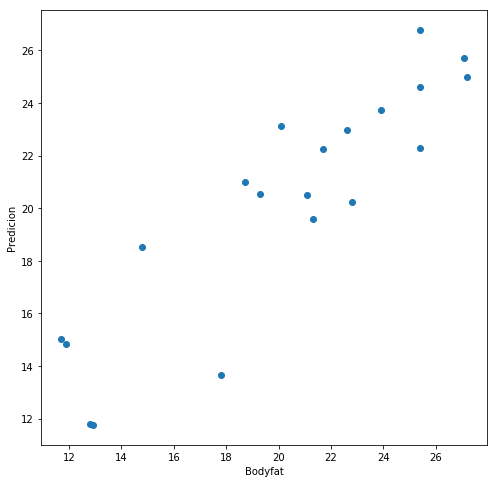

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(bodyfat_data.bodyfat,prediction,'o')
ax.set_xlabel('Bodyfat')
ax.set_ylabel('Predicion');

 It is difficult to see if the model is a good predictor; what we need is a
 numerical assessment of predictive ability. We compute the exact LOOCV as seen in class:
 
 $LOOCV = \frac{1}{N} \sum_{i=1}^{N} \left(\frac{y_i - \hat{y}_i}{1-h_i}\right)^2$
 
 where $H = X (X^TX)^{-1}X^T$ and $h_i = diag(H)_i$

In [42]:
H= np.diag(model.exog@inv(model.exog.T@model.exog)@model.exog.T)

LOOCV = np.sum( (result.resid_response/(1-H))**2) / N
LOOCV

8.036828037162582

 and the corresponding predictive R-square 

In [43]:
R2_LOOCV = (1 - LOOCV*N/((N-1)*np.var(bodyfat_data.bodyfat)))*100
R2_LOOCV

65.8457880658071

 we can see that prediction quality is not as good as it seemed (since CV error is worse than training error)

 this last number is the one I recommend to do model selection!!!

***

 Let us continue now with *regularized linear regression* (aka ridge regression)
 this time we need to use scikit-learn RidgeCV

 We must first choose a value for lambda (the regularization constant)
 there are several criteria to do this, the most used of which is the GCV
 so we optimize the GCV for several values of lambda in a sequence

notice we start with a wide logarithmic search

In [44]:
lambdas = 10**np.arange(-6,2,0.1)
ridge = RidgeCV(alphas=lambdas,normalize=True)
ridge.fit(bodyfat_data.loc[:,'triceps':'midarm'],
          bodyfat_data.bodyfat)
print('LAMBDA=',ridge.alpha_);

LAMBDA= 0.0019952623149688256


 best value (according to GCV) is 0.01995262

 we perform a finer search

In [45]:
lambdas = np.arange(0.0001,1,0.0001)
ridge = RidgeCV(alphas=lambdas,
                normalize=True,
                store_cv_values=True)
ridge.fit(bodyfat_data.loc[:,'triceps':'midarm'],
          bodyfat_data.bodyfat)
print('LAMBDA=',ridge.alpha_);

LAMBDA= 0.0019000000000000002


 Definitely the best value is 0.019, so we refit the model with this precise value:

In [46]:
bodyfat_ridge_reg = Ridge(alpha=0.0019,
                          normalize=True).fit(bodyfat_data.loc[:,'triceps':'midarm'],
                                              bodyfat_data.bodyfat)
pd.DataFrame([bodyfat_ridge_reg.intercept_,
              bodyfat_ridge_reg.coef_[0],
              bodyfat_ridge_reg.coef_[1],
              bodyfat_ridge_reg.coef_[2]],
             index=['Intercept','triceps','thigh','midarm'])


,0
Intercept,23.587
triceps,1.504
thigh,-0.435
midarm,-0.695


 Now let us compare these results with those obtained by standard regression (without regularization)

 Hand calculation of coefficients, since we know the theory:

In [47]:
X= np.concatenate((np.ones((bodyfat_data.shape[0],1)), 
                   bodyfat_data.loc[:,'triceps':'midarm']), 
                  axis=1).T
w = pinv(X) @ bodyfat_data.bodyfat
pd.DataFrame(w, index=['Intercept','triceps','thigh','midarm'])

,0
Intercept,117.085
triceps,4.334
thigh,-2.857
midarm,-2.186


they should coincide with the results of GLM

In [48]:
result.params

Intercept    117.085
triceps        4.334
thigh         -2.857
midarm        -2.186
dtype: float64

 Notice that the regularized weights are smaller (in absolute value), one by one

 Now we calculate the corresponding prediction errors
 First by standard regression (without regularization, we already did this)

In [49]:
R2_LOOCV

65.8457880658071

 Now those with ridge regression (with regularization):

In [50]:
resid = bodyfat_ridge_reg.\
          predict(bodyfat_data.loc[:,'triceps':'midarm'])-bodyfat_data.bodyfat
LOOCV_ridge = np.sum( (resid/(1-H))**2) / N
LOOCV_ridge
R2_LOOCV_ridge = (1 - LOOCV_ridge*N/((N-1)*np.var(bodyfat_data.bodyfat)))*100
R2_LOOCV_ridge

8.422173377848805

64.2081809933659

 The prediction errors are quite close and the model is way simpler: 
 we would probably prefer the regularized one

***

Now we use the LASSO: here the coefficients are penalized by the L1 norm. The 
 optimal value for lambda is again chosen by cross-validation

LAMBDA= 1.0349280998473913


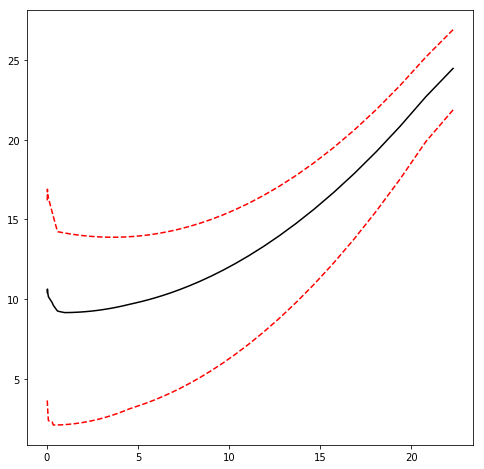

In [51]:
lasso =LassoCV(max_iter=5000)
lasso.fit(bodyfat_data.loc[:,'triceps':'midarm'],bodyfat_data.bodyfat)
print('LAMBDA=',lasso.alpha_)
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(lasso.alphas_,lasso.mse_path_.mean(axis=1),'k-')
plt.plot(lasso.alphas_,lasso.mse_path_.max(axis=1),'r--')
plt.plot(lasso.alphas_,lasso.mse_path_.min(axis=1),'r--');

Predictions can be made based on the fitted object; for instance, this would be the TR error with the *optimal* lambda as chosen by LOOCV


In [52]:
bodyfat_lasso_reg =Lasso(alpha=1.0349, max_iter=5000)
bodyfat_lasso_reg.fit(bodyfat_data.loc[:,'triceps':'midarm'],
                      bodyfat_data.bodyfat)
print('Intercept:', bodyfat_lasso_reg.intercept_)
print('triceps:', bodyfat_lasso_reg.coef_[0])
print('thigh:', bodyfat_lasso_reg.coef_[1])
print('midarm:', bodyfat_lasso_reg.coef_[2]);

Intercept: -17.803172901893376
triceps: 0.18928783908462435
thigh: 0.6489787792428563
midarm: 0.0


In [53]:
 pd.DataFrame(bodyfat_lasso_reg.predict(bodyfat_data.loc[:,'triceps':'midarm']))

,0
0,13.859
1,19.191
2,21.690
3,23.077
4,13.199
5,22.023
6,26.106
7,21.290
8,18.764
9,21.744


And this would be corresponding LOOCV  and the corresponding predictive R-square 

In [54]:
resid = bodyfat_lasso_reg.\
          predict(bodyfat_data.loc[:,'triceps':'midarm'])-bodyfat_data.bodyfat
LOOCV_lasso = np.sum( (resid/(1-H))**2) / N
LOOCV_lasso
R2_LOOCV_lasso = (1 - LOOCV_lasso*N/((N-1)*np.var(bodyfat_data.bodyfat)))*100
R2_LOOCV_lasso

9.023634611567775

61.652143418386096